In [5]:
import sys
sys.path.append('../src')

In [70]:
from loaders import load_flask, load_insitu
import datetime

In [7]:
import os
cwd = os.getcwd()

In [8]:
mlo_df = load_insitu('../data/co2_mlo_surface-insitu_1_ccgg_DailyData.txt')
hpb_df = load_flask('../data/co2_hpb_surface-flask_1_ccgg_event.txt')
oxk_df = load_flask('../data/co2_oxk_surface-flask_1_ccgg_event.txt')

16948it [00:00, 166632.05it/s]
1380it [00:12, 108.44it/s]
1185it [00:10, 108.70it/s]


Raw Data Plot of CO2 concentration vs. time
Hohenpeissenberg

In [56]:
import matplotlib.pyplot as plt
from utils import merge_date
import matplotlib
%matplotlib inline

hpb_df['date'] = hpb_df.apply(merge_date, axis=1)
oxk_df['date'] = oxk_df.apply(merge_date, axis=1)
mlo_df['date'] = mlo_df.apply(lambda _x: merge_date(_x, prefix='', names={"seconds": "second"}), axis=1)

0
1310    411.450
1311    538.660
Name: analysis_value, dtype: object


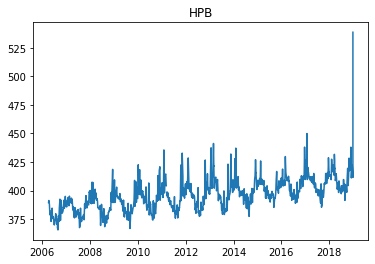

In [109]:
hpb_y = hpb_df['analysis_value'].astype('<f')
hpb_x = hpb_df['date']

print(len(hpb_df[hpb_df['date'] == set(hpb_x)]))

hpb_y = [x if x > -999 else None for x in hpb_y]

plt.plot(hpb_x, hpb_y)
plt.title('HPB')
plt.show()

hpb_at_date = hpb_df[hpb_df['date'] == datetime.datetime(2018, 12, 27, 11, 55, 00)]

print(hpb_at_date['analysis_value'])

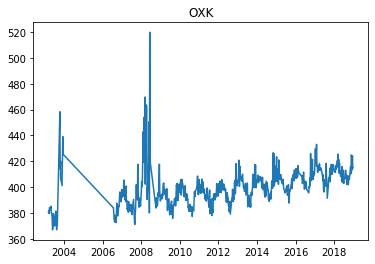

1113    414.610
1114    414.710
Name: analysis_value, dtype: object


In [104]:
oxk_y = oxk_df['analysis_value'].astype('<f')
oxk_x = oxk_df['date']

oxk_y = [x if x > -999 else None for x in oxk_y]

plt.plot(oxk_x, oxk_y)
plt.title('OXK')
plt.show()

time_diff = oxk_df['date'] - datetime.datetime(2018, 12, 27, 11, 55, 00)
is_within_range = abs(time_diff) < datetime.timedelta(days=15)

oxk_at_date = oxk_df[is_within_range]

print(oxk_at_date['analysis_value'])


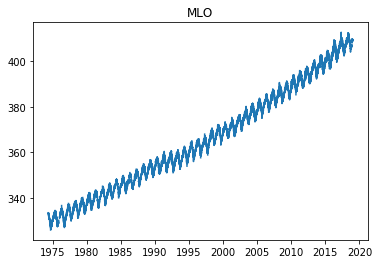

In [102]:
mlo_y = mlo_df['value'].astype('<f')
mlo_x = mlo_df['date']

mlo_y = [x if x > -999 else None for x in mlo_y]

plt.plot(mlo_x, mlo_y)
plt.title('MLO')
plt.show()


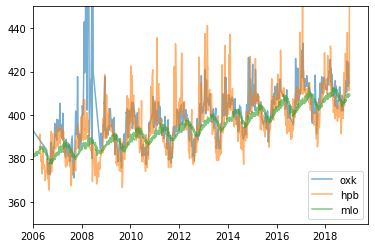

In [105]:
plt.plot(oxk_x, oxk_y, label='oxk', alpha=0.6)
plt.plot(hpb_x, hpb_y, label='hpb', alpha=0.6)
plt.plot(mlo_x, mlo_y, label='mlo', alpha=0.6)
plt.xlim(datetime.datetime(2006, 1, 1), datetime.datetime(2019, 10, 1))
plt.ylim(350, 450)
plt.legend()
plt.show()
